In [1]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
import matplotlib.cm as cm
import colormaps as cmaps
from colormaps.utils import show_cmaps_collection
from scipy.optimize import curve_fit



In [2]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Decreasing Accumulation

Grounding Line Plot - Amax-0.06


In [3]:
gl_run_title_amax06 = str("Grounding Line Evolution Over Time - Max Accumulation - 0.06")
amax_06 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_20__12_20_49.pkl.gz"
with gzip.open(amax_06, 'rb') as f:
    DATA_dict_amax_06 = pickle.load(f)

In [4]:
bed_dict = DATA_dict_amax_06['bed_dict']
base_dict = DATA_dict_amax_06['base_dict']
surf_dict= DATA_dict_amax_06 ['surf_dict']
sed_dict = DATA_dict_amax_06['sed_dict']
H_dict = DATA_dict_amax_06['H_dict']
us_dict_06 = DATA_dict_amax_06['us_dict']
ub_dict_06 = DATA_dict_amax_06['ub_dict']
Hs_dict = DATA_dict_amax_06['Hs_dict']
GL_dict_06 = DATA_dict_amax_06['GL_dict']
Qs_dict_06 = DATA_dict_amax_06['Qs_dict']

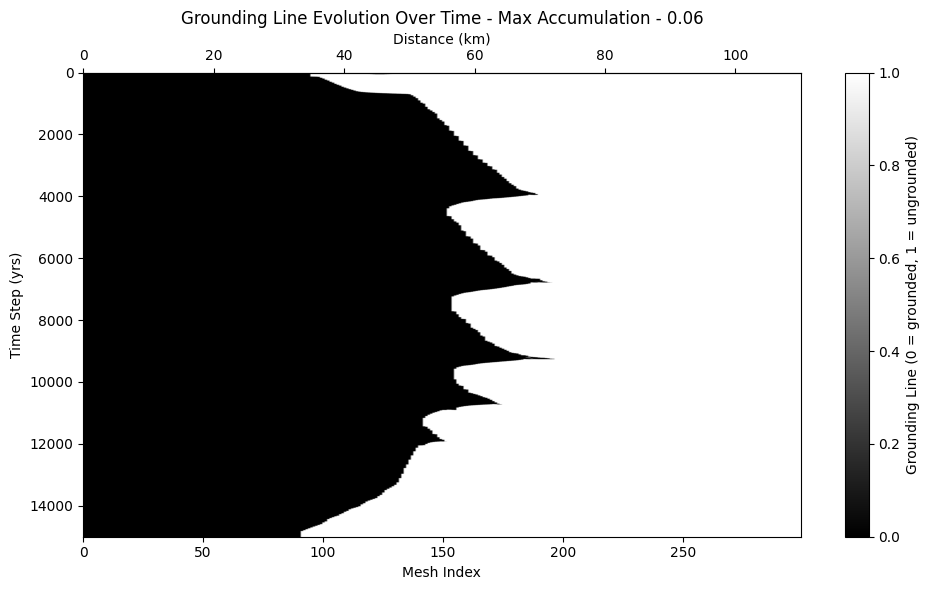

In [5]:
GL_dict = DATA_dict_amax_06['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax06)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [6]:
gl_positions_amax06 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax06.append(idx)

gl_positions_amax06 = np.array(gl_positions_amax06)
GL_km_amax06 = mesh_index_to_km(gl_positions_amax06)

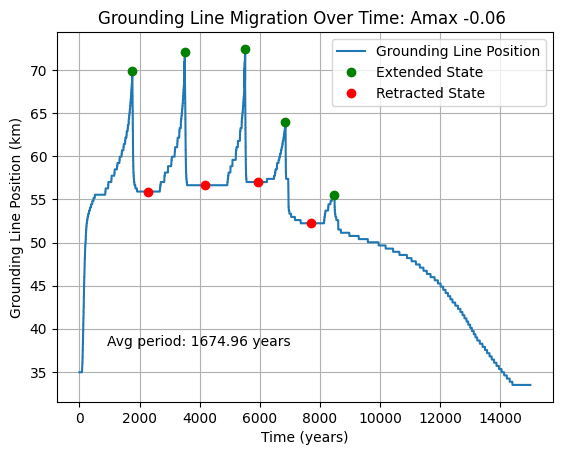

Mean cycle period: 1674.96 years
[1748.61375255 2003.90066219 1344.54050105 1602.76565774]
Mean advance amplitude: 66.81 km
[69.89966555 72.10702341 72.47491639 64.01337793 55.55183946]
Mean retreat amplitude: 55.46 km
[55.91973244 56.65551839 57.02341137 52.24080268]


In [7]:
peaks_amax06, _ = find_peaks(GL_km_amax06, prominence=3) 
troughs_amax06, _ = find_peaks(-GL_km_amax06, prominence=3)     
periods_amax06 = np.diff(np.array(time)[peaks_amax06])
adv_dists_amax06 = GL_km_amax06[peaks_amax06]
ret_dists_amax06 = GL_km_amax06[troughs_amax06]


plt.plot(time, GL_km_amax06, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax06], GL_km_amax06[peaks_amax06], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax06], GL_km_amax06[troughs_amax06], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax06):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.06 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax06):.2f} years")
print(periods_amax06)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax06):.2f} km")
print(adv_dists_amax06)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax06):.2f} km")
print(ret_dists_amax06)


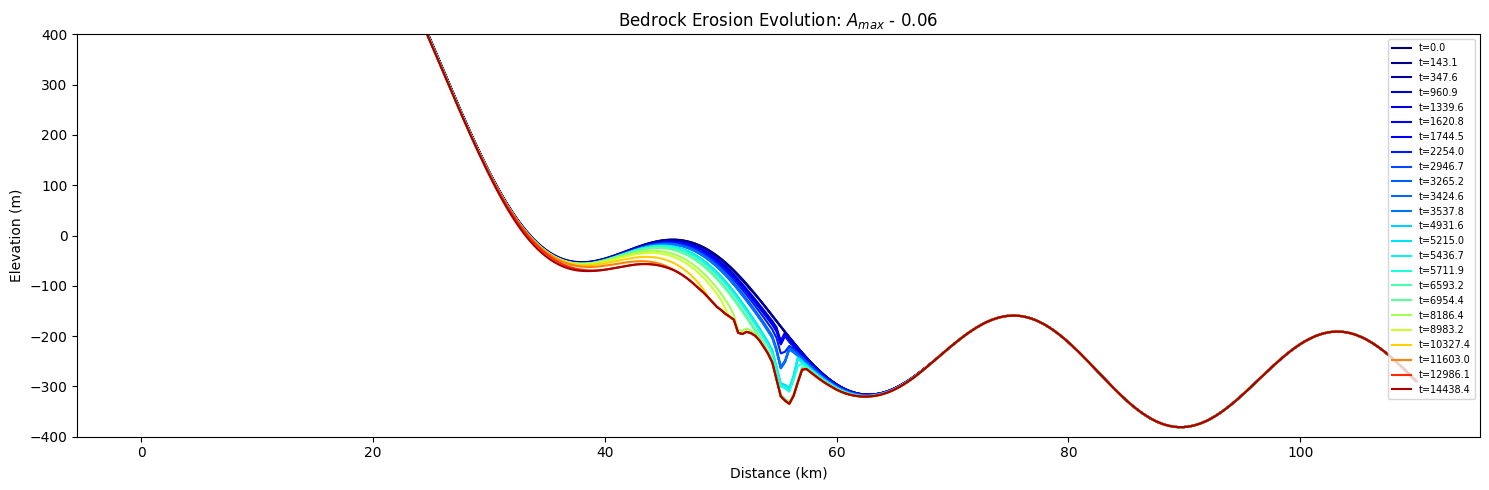

In [8]:
bed_dict = DATA_dict_amax_06['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{max}$ - 0.06 ")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amax/GL_Plots/Relationship_Plots/Bedrock_Evo_amax5.svg", format ="svg", bbox_inches='tight')

21747.081102855696


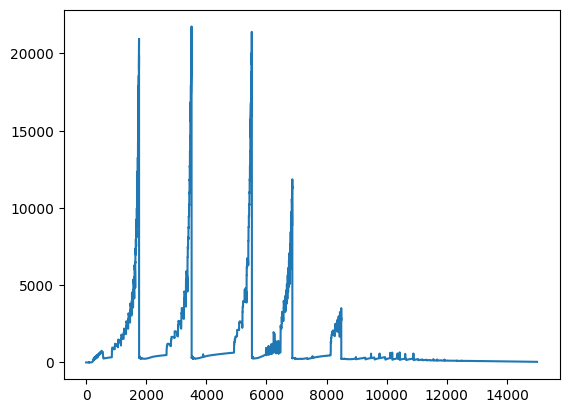

In [9]:
max_Qs_06 = np.array([max(values) for values in Qs_dict_06.values()])
time_06 = np.array(list(Qs_dict_06.keys()))

# mask = time_06 <= 10000

# time_06 = time_06[mask]
# max_Qs_06 = max_Qs_06[mask]
plt.plot(time_06, max_Qs_06)
MAX_06 = np.max(max_Qs_06)

# MAX_21 = np.median(max_Qs_06)
print(MAX_06)

Grounding Line Plot - Amax - 0.05


In [10]:
gl_run_title_amax05 = str("Grounding Line Evolution Over Time - Max Accumulation -0.05")
amax05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_17__21_29_30.pkl.gz"
with gzip.open(amax05, 'rb') as f:
    DATA_dict_amax05 = pickle.load(f)

In [11]:
bed_dict = DATA_dict_amax05['bed_dict']
base_dict = DATA_dict_amax05['base_dict']
surf_dict= DATA_dict_amax05 ['surf_dict']
sed_dict = DATA_dict_amax05['sed_dict']
H_dict = DATA_dict_amax05['H_dict']
us_dict_05 = DATA_dict_amax05['us_dict']
ub_dict_05 = DATA_dict_amax05['ub_dict']
Hs_dict = DATA_dict_amax05['Hs_dict']
GL_dict_05 = DATA_dict_amax05['GL_dict']
Qs_dict_05 = DATA_dict_amax05['Qs_dict']

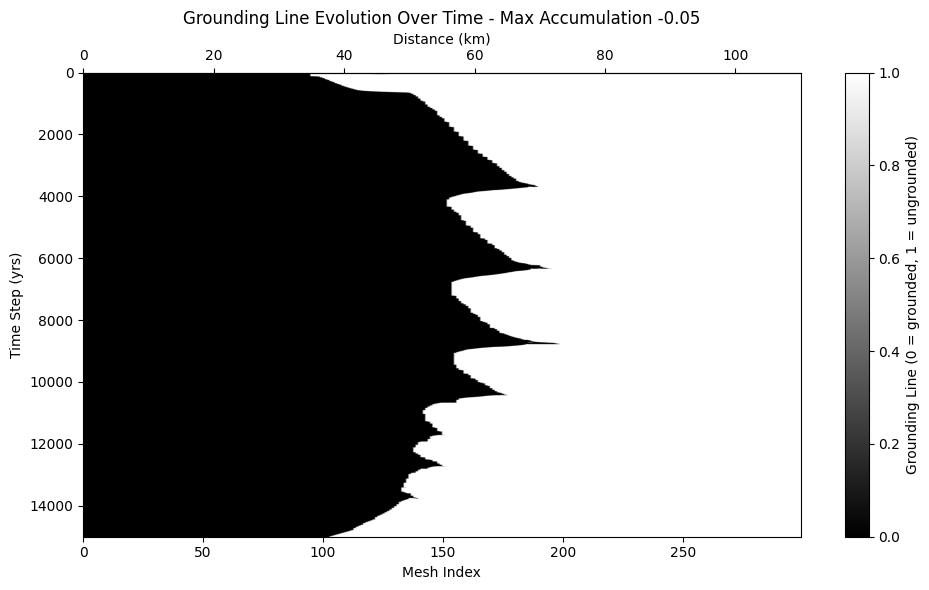

In [12]:
GL_dict = DATA_dict_amax05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [13]:
gl_positions_amax05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax05.append(idx)

gl_positions_amax05 = np.array(gl_positions_amax05)
GL_km_amax05 = mesh_index_to_km(gl_positions_amax05)



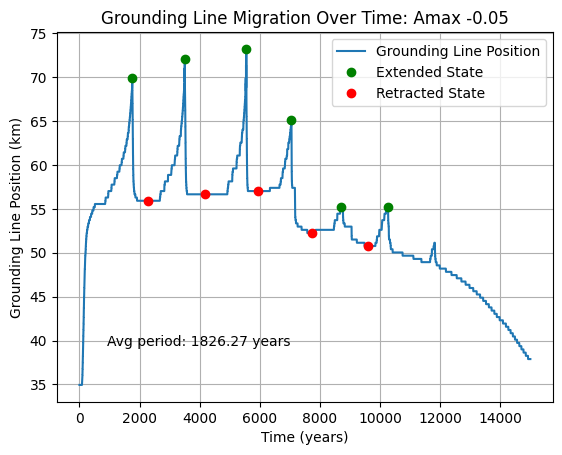

Mean cycle period: 1826.27 years
[1890.32908611 1770.80594794 1780.66736991 1863.2646309 ]
Mean advance amplitude: 65.12 km
[69.89966555 72.10702341 73.21070234 65.11705686 55.18394649 55.18394649]
Mean retreat amplitude: 54.52 km
[55.91973244 56.65551839 57.02341137 52.24080268 50.76923077]


In [14]:
peaks_amax05, _ = find_peaks(GL_km_amax05, prominence=2.8) 
troughs_amax05, _ = find_peaks(-GL_km_amax05, prominence=2.8)     
periods_amax05 = np.diff(np.array(time)[troughs_amax05])
adv_dists_amax05 = GL_km_amax05[peaks_amax05]
ret_dists_amax05 = GL_km_amax05[troughs_amax05]


plt.plot(time, GL_km_amax05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax05], GL_km_amax05[peaks_amax05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax05], GL_km_amax05[troughs_amax05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.05")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax05):.2f} years")
print(periods_amax05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax05):.2f} km")
print(adv_dists_amax05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax05):.2f} km")
print(ret_dists_amax05)


21747.081102855696


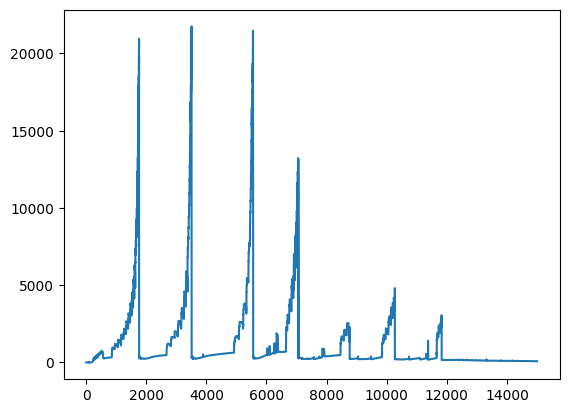

In [15]:
max_Qs_05 = np.array([max(values) for values in Qs_dict_05.values()])
time_05 = np.array(list(Qs_dict_05.keys()))

# mask = time_05 <= 10000

# time_05 = time_05[mask]
# max_Qs_05 = max_Qs_05[mask]
plt.plot(time_05, max_Qs_05)
MAX_05 = np.max(max_Qs_05)

# MAX_21 = np.median(max_Qs_55)
print(MAX_05)

Grounding Line Plot - Amax - 0.04


In [16]:
gl_run_title_amax04 = str("Grounding Line Evolution Over Time - Max Accumulation -0.04")
amax04 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_20__10_39_13.pkl.gz"
with gzip.open(amax04, 'rb') as f:
    DATA_dict_amax04 = pickle.load(f)

In [17]:
bed_dict = DATA_dict_amax04['bed_dict']
base_dict = DATA_dict_amax04['base_dict']
surf_dict= DATA_dict_amax04 ['surf_dict']
sed_dict = DATA_dict_amax04['sed_dict']
H_dict = DATA_dict_amax04['H_dict']
us_dict_04 = DATA_dict_amax04['us_dict']
ub_dict_04 = DATA_dict_amax04['ub_dict']
Hs_dict = DATA_dict_amax04['Hs_dict']
GL_dict_04 = DATA_dict_amax04['GL_dict']
Qs_dict_04 = DATA_dict_amax04['Qs_dict']

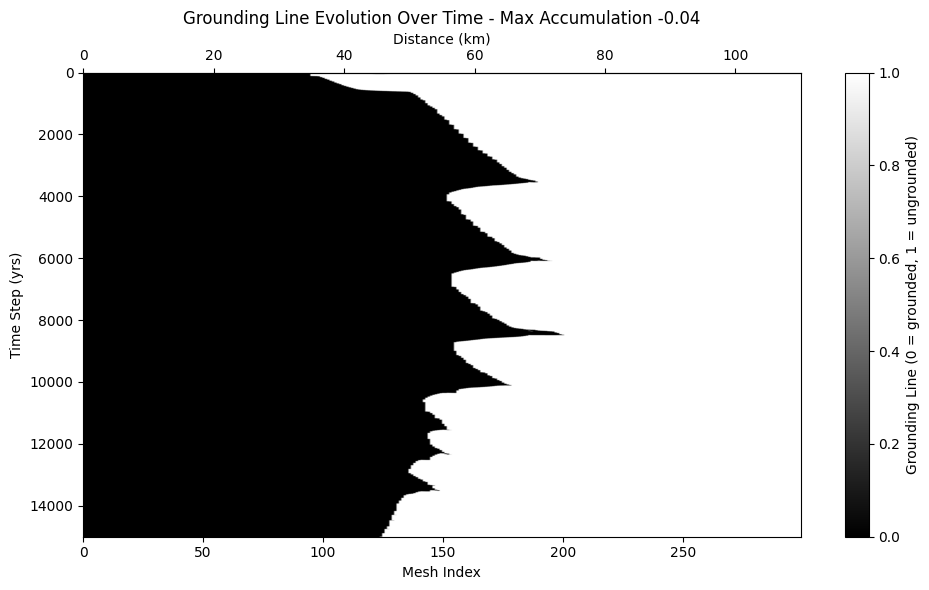

In [18]:
GL_dict = DATA_dict_amax04['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax04)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [19]:
gl_positions_amax04 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax04.append(idx)

gl_positions_amax04 = np.array(gl_positions_amax04)
GL_km_amax04 = mesh_index_to_km(gl_positions_amax04)



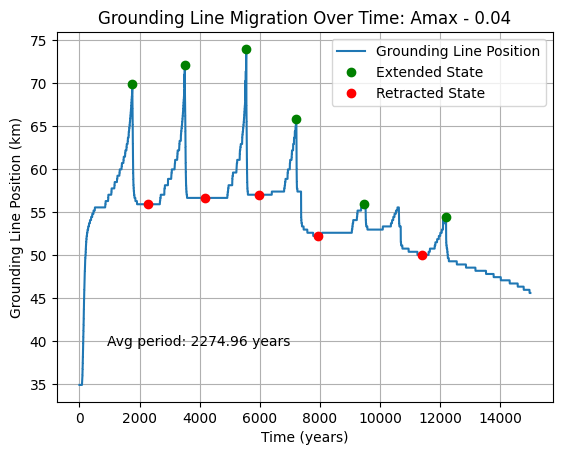

Mean cycle period: 2274.96 years
[1890.32908611 1800.76814629 1944.82091565 3463.90626298]
Mean advance amplitude: 65.36 km
[69.89966555 72.10702341 73.94648829 65.85284281 55.91973244 54.44816054]
Mean retreat amplitude: 54.37 km
[55.91973244 56.65551839 57.02341137 52.24080268 50.03344482]


In [20]:
peaks_amax04, _ = find_peaks(GL_km_amax04, prominence=2.8) 
troughs_amax04, _ = find_peaks(-GL_km_amax04, prominence=2.6)     
periods_amax04 = np.diff(np.array(time)[troughs_amax04])
adv_dists_amax04 = GL_km_amax04[peaks_amax04]
ret_dists_amax04 = GL_km_amax04[troughs_amax04]


plt.plot(time, GL_km_amax04, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax04], GL_km_amax04[peaks_amax04], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax04], GL_km_amax04[troughs_amax04], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax04):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax - 0.04")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax04):.2f} years")
print(periods_amax04)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax04):.2f} km")
print(adv_dists_amax04)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax04):.2f} km")
print(ret_dists_amax04)


22090.691437675123


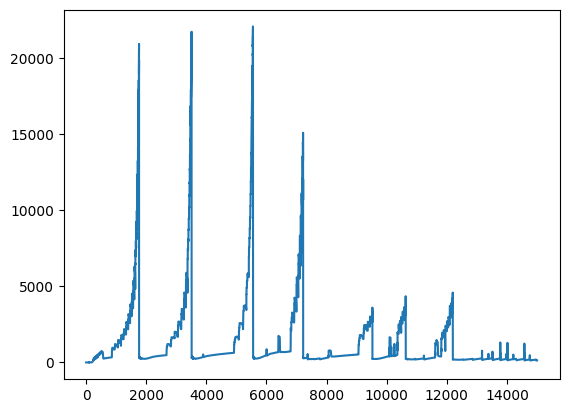

In [21]:
max_Qs_04 = np.array([max(values) for values in Qs_dict_04.values()])
time_04 = np.array(list(Qs_dict_04.keys()))

# mask = time_04 <= 10000

# time_04 = time_04[mask]
# max_Qs_04 = max_Qs_04[mask]
plt.plot(time_04, max_Qs_04)
MAX_04 = np.max(max_Qs_04)

# MAX_21 = np.median(max_Qs_6)
print(MAX_04)

Grounding Line Plot - Amax - 0.03


In [22]:
gl_run_title_amax03 = str("Grounding Line Evolution Over Time - Max Accumulation -0.03")
amax03 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_20__14_11_19.pkl.gz"
with gzip.open(amax03, 'rb') as f:
    DATA_dict_amax03 = pickle.load(f)

In [23]:
bed_dict = DATA_dict_amax03['bed_dict']
base_dict = DATA_dict_amax03['base_dict']
surf_dict= DATA_dict_amax03 ['surf_dict']
sed_dict = DATA_dict_amax03['sed_dict']
H_dict = DATA_dict_amax03['H_dict']
us_dict_03 = DATA_dict_amax03['us_dict']
ub_dict_03 = DATA_dict_amax03['ub_dict']
Hs_dict = DATA_dict_amax03['Hs_dict']
GL_dict_03 = DATA_dict_amax03['GL_dict']
Qs_dict_03 = DATA_dict_amax03['Qs_dict']

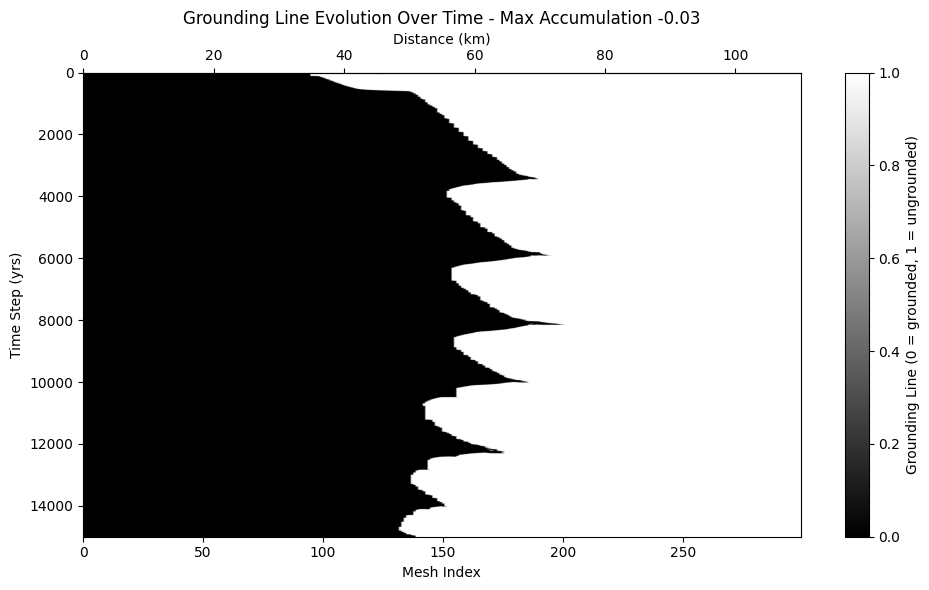

In [24]:
GL_dict = DATA_dict_amax03['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax03)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [25]:
gl_positions_amax03 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax03.append(idx)

gl_positions_amax03 = np.array(gl_positions_amax03)
GL_km_amax03 = mesh_index_to_km(gl_positions_amax03)



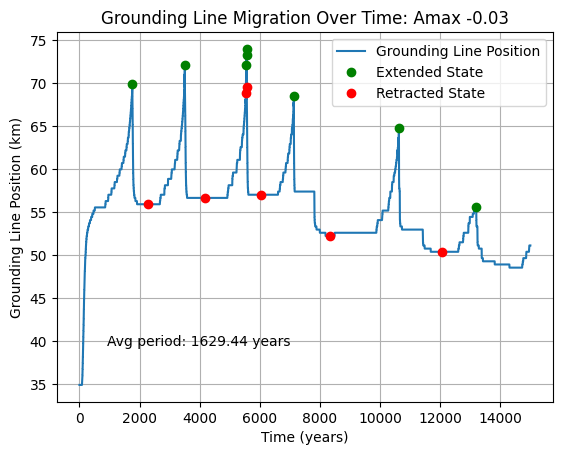

Mean cycle period: 1629.44 years
[1890.32908611 1376.31316767    6.87894058  482.9803603  2292.89789716
 3727.23345236]
Mean advance amplitude: 68.75 km
[69.89966555 72.10702341 72.10702341 73.21070234 73.94648829 68.42809365
 64.74916388 55.55183946]
Mean retreat amplitude: 58.65 km
[55.91973244 56.65551839 68.79598662 69.53177258 57.02341137 52.24080268
 50.40133779]


In [26]:
peaks_amax03, _ = find_peaks(GL_km_amax03, prominence=3) 
troughs_amax03, _ = find_peaks(-GL_km_amax03, prominence=3)     
periods_amax03 = np.diff(np.array(time)[troughs_amax03])
adv_dists_amax03 = GL_km_amax03[peaks_amax03]
ret_dists_amax03 = GL_km_amax03[troughs_amax03]


plt.plot(time, GL_km_amax03, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax03], GL_km_amax03[peaks_amax03], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax03], GL_km_amax03[troughs_amax03], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax03):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.03")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax03):.2f} years")
print(periods_amax03)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax03):.2f} km")
print(adv_dists_amax03)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax03):.2f} km")
print(ret_dists_amax03)


22247.77821091721


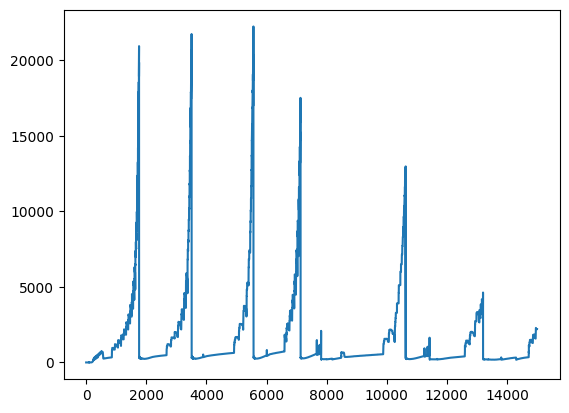

In [27]:
max_Qs_03 = np.array([max(values) for values in Qs_dict_03.values()])
time_03 = np.array(list(Qs_dict_03.keys()))

# mask = time_03 <= 10000

# time_03 = time_03[mask]
# max_Qs_03 = max_Qs_03[mask]
plt.plot(time_03, max_Qs_03)
MAX_03 = np.max(max_Qs_03)

# MAX_21 = np.median(max_Qs_03)
print(MAX_03)

Grounding Line Plot - Amax - 0.02


In [28]:
gl_run_title_amax02 = str("Grounding Line Evolution Over Time - Max Accumulation - 0.02")
amax02 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_18__09_02_28.pkl.gz"
with gzip.open(amax02, 'rb') as f:
    DATA_dict_amax02 = pickle.load(f)

In [29]:
bed_dict = DATA_dict_amax02['bed_dict']
base_dict = DATA_dict_amax02['base_dict']
surf_dict= DATA_dict_amax02['surf_dict']
sed_dict = DATA_dict_amax02['sed_dict']
H_dict = DATA_dict_amax02['H_dict']
us_dict_02 = DATA_dict_amax02['us_dict']
ub_dict_02 = DATA_dict_amax02['ub_dict']
Hs_dict = DATA_dict_amax02['Hs_dict']
GL_dict_02 = DATA_dict_amax02['GL_dict']
Qs_dict_02 = DATA_dict_amax02['Qs_dict']

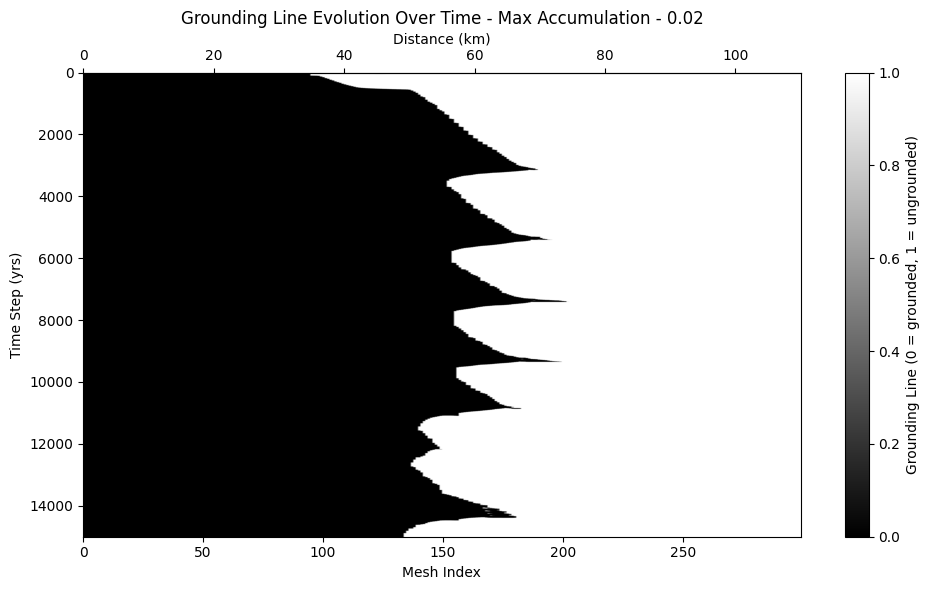

In [30]:
GL_dict = DATA_dict_amax02['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax02)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [31]:
gl_positions_amax02 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax02.append(idx)

gl_positions_amax02 = np.array(gl_positions_amax02)
GL_km_amax02 = mesh_index_to_km(gl_positions_amax02)



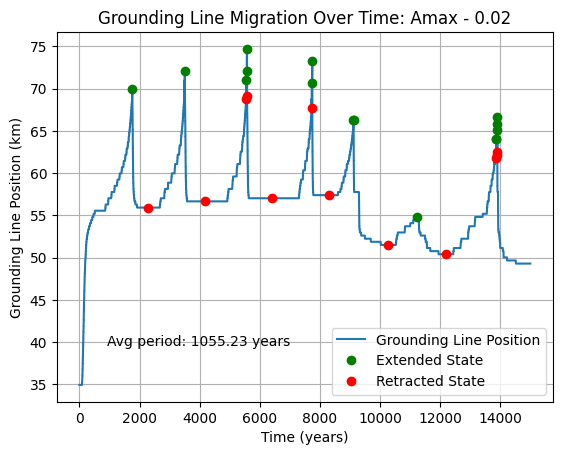

Mean cycle period: 1055.23 years
[1890.32908611 1375.10443241    7.76605987  831.06331463 1343.26280188
  581.06905005 1959.21359173 1922.05989928 1672.78312616   13.89404405
   10.99680798]
Mean advance amplitude: 67.77 km
[69.89966555 72.10702341 71.00334448 72.10702341 74.68227425 70.63545151
 73.21070234 66.22073579 66.22073579 54.81605351 64.01337793 64.01337793
 65.11705686 65.85284281 66.58862876]
Mean retreat amplitude: 60.09 km
[55.91973244 56.65551839 68.79598662 69.1638796  57.02341137 67.69230769
 57.39130435 51.50501672 50.40133779 61.80602007 62.17391304 62.54180602]


In [32]:
peaks_amax02, _ = find_peaks(GL_km_amax02, prominence=2) 
troughs_amax02, _ = find_peaks(-GL_km_amax02, prominence=2)     
periods_amax02 = np.diff(np.array(time)[troughs_amax02])
adv_dists_amax02 = GL_km_amax02[peaks_amax02]
ret_dists_amax02 = GL_km_amax02[troughs_amax02]


plt.plot(time, GL_km_amax02, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax02], GL_km_amax02[peaks_amax02], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax02], GL_km_amax02[troughs_amax02], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax02):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax - 0.02")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax02):.2f} years")
print(periods_amax02)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax02):.2f} km")
print(adv_dists_amax02)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax02):.2f} km")
print(ret_dists_amax02)


22266.920085918442


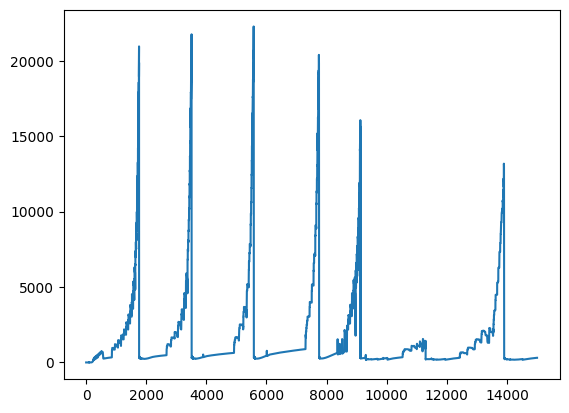

In [33]:
max_Qs_02 = np.array([max(values) for values in Qs_dict_02.values()])
time_02 = np.array(list(Qs_dict_02.keys()))

# mask = time_02 <= 10000

# time_02 = time_02[mask]
# max_Qs_02 = max_Qs_02[mask]
plt.plot(time_02, max_Qs_02)
MAX_02 = np.max(max_Qs_02)

# MAX_21 = np.median(max_Qs_02)
print(MAX_02)

Grounding Line Plot - Amax - 0.01


In [34]:
gl_run_title_amax01 = str("Grounding Line Evolution Over Time - Max Accumulation - 0.01")
amax01 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_18__11_42_53.pkl.gz"
with gzip.open(amax01, 'rb') as f:
    DATA_dict_amax01 = pickle.load(f)

In [35]:
bed_dict = DATA_dict_amax01['bed_dict']
base_dict = DATA_dict_amax01['base_dict']
surf_dict= DATA_dict_amax01['surf_dict']
sed_dict = DATA_dict_amax01['sed_dict']
H_dict = DATA_dict_amax01['H_dict']
us_dict_01 = DATA_dict_amax01['us_dict']
ub_dict_01 = DATA_dict_amax01['ub_dict']
Hs_dict = DATA_dict_amax01['Hs_dict']
GL_dict_01 = DATA_dict_amax01['GL_dict']
Qs_dict_01 = DATA_dict_amax01['Qs_dict']

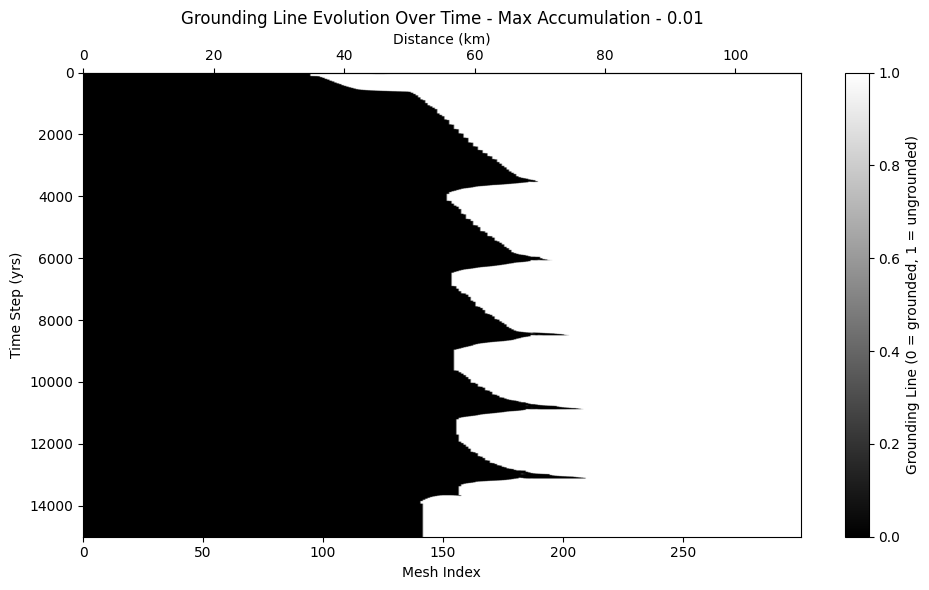

In [36]:
GL_dict = DATA_dict_amax01['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax01)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [37]:
gl_positions_amax01 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax01.append(idx)

gl_positions_amax01 = np.array(gl_positions_amax01)
GL_km_amax01 = mesh_index_to_km(gl_positions_amax01)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amax01 = GL_km_amax01[mask]


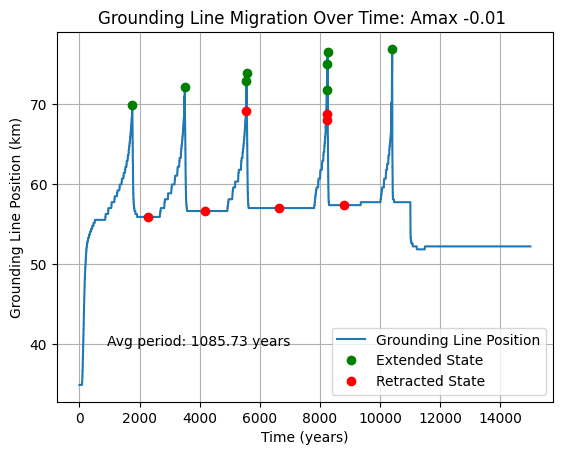

Mean cycle period: 1085.73 years
[1890.32908611 1377.80316386 1087.55401441 1589.73314924   14.25995451
  554.70699334]
Mean advance amplitude: 73.62 km
[69.89966555 72.10702341 72.84280936 73.94648829 71.73913043 75.05016722
 76.52173913 76.88963211]
Mean retreat amplitude: 61.86 km
[55.91973244 56.65551839 69.1638796  57.02341137 68.06020067 68.79598662
 57.39130435]


In [38]:
peaks_amax01, _ = find_peaks(GL_km_amax01, prominence=3) 
troughs_amax01, _ = find_peaks(-GL_km_amax01, prominence=3)     
periods_amax01 = np.diff(np.array(time)[troughs_amax01])
adv_dists_amax01 = GL_km_amax01[peaks_amax01]
ret_dists_amax01 = GL_km_amax01[troughs_amax01]


plt.plot(time, GL_km_amax01, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax01], GL_km_amax01[peaks_amax01], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax01], GL_km_amax01[troughs_amax01], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax01):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.01 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax01):.2f} years")
print(periods_amax01)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax01):.2f} km")
print(adv_dists_amax01)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax01):.2f} km")
print(ret_dists_amax01)


22735.360113306015


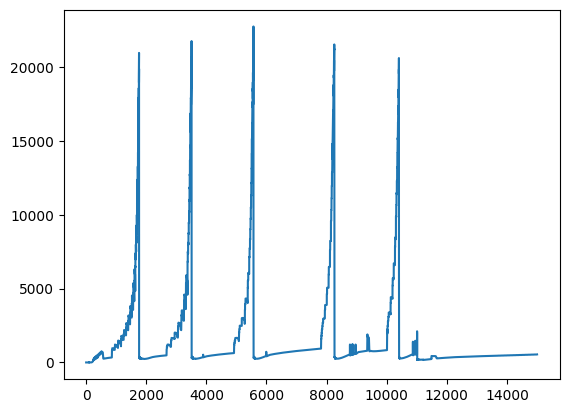

In [39]:
max_Qs_01 = np.array([max(values) for values in Qs_dict_01.values()])
time_01 = np.array(list(Qs_dict_01.keys()))

plt.plot(time_01, max_Qs_01)
MAX_01 = np.max(max_Qs_01)

print(MAX_01)

Grounding Line Plot - Amin & Amax -0.05


In [40]:
gl_run_title_amax_amin_05 = str("Grounding Line Evolution Over Time - Ablation & Accumulation - 0.05")
amax_amin_05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_25__14_21_57.pkl.gz"
with gzip.open(amax_amin_05, 'rb') as f:
    DATA_dict_amax_amin_05 = pickle.load(f)

In [41]:
bed_dict = DATA_dict_amax_amin_05['bed_dict']
base_dict = DATA_dict_amax_amin_05['base_dict']
surf_dict= DATA_dict_amax_amin_05['surf_dict']
sed_dict = DATA_dict_amax_amin_05['sed_dict']
H_dict = DATA_dict_amax_amin_05['H_dict']
us_dict_accabl = DATA_dict_amax_amin_05['us_dict']
ub_dict_accabl = DATA_dict_amax_amin_05['ub_dict']
Hs_dict = DATA_dict_amax_amin_05['Hs_dict']
GL_dict_ = DATA_dict_amax_amin_05['GL_dict']
Qs_dict_accabl = DATA_dict_amax_amin_05['Qs_dict']

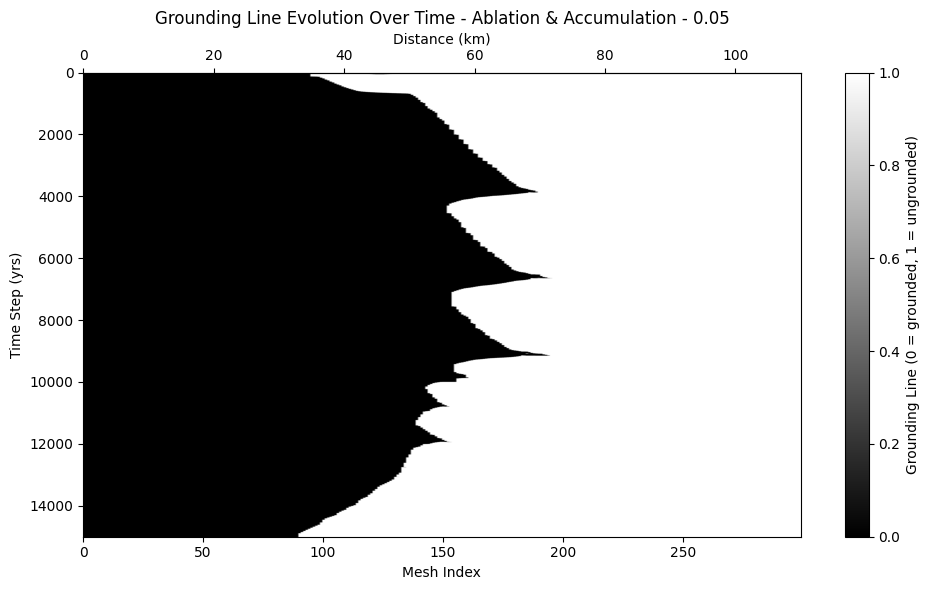

In [42]:
GL_dict = DATA_dict_amax_amin_05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax_amin_05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [43]:
gl_positions_amax_amin_05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax_amin_05.append(idx)

gl_positions_amax_amin_05 = np.array(gl_positions_amax_amin_05)
GL_km_amax_amin_05 = mesh_index_to_km(gl_positions_amax_amin_05)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amax_amin_05 = GL_km_amax_amin_05[mask]


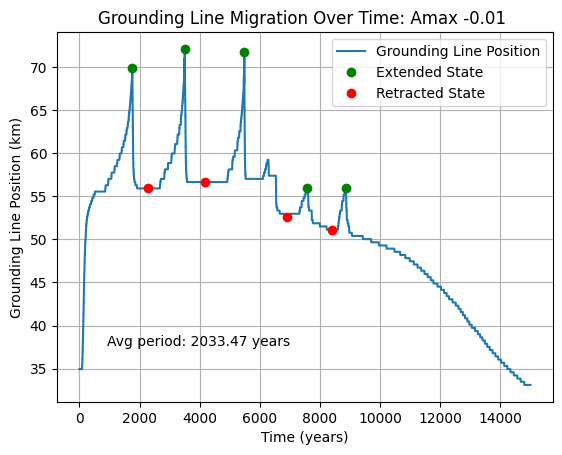

Mean cycle period: 2033.47 years
[1890.32908611 2711.70505601 1498.36511603]
Mean advance amplitude: 65.12 km
[69.89966555 72.10702341 71.73913043 55.91973244 55.91973244]
Mean retreat amplitude: 54.08 km
[55.91973244 56.65551839 52.60869565 51.13712375]


In [44]:
peaks_amax_amin_05, _ = find_peaks(GL_km_amax_amin_05, prominence=3) 
troughs_amax_amin_05, _ = find_peaks(-GL_km_amax_amin_05, prominence=3)     
periods_amax_amin_05 = np.diff(np.array(time)[troughs_amax_amin_05])
adv_dists_amax_amin_05 = GL_km_amax_amin_05[peaks_amax_amin_05]
ret_dists_amax_amin_05 = GL_km_amax_amin_05[troughs_amax_amin_05]


plt.plot(time, GL_km_amax_amin_05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax_amin_05], GL_km_amax_amin_05[peaks_amax_amin_05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax_amin_05], GL_km_amax_amin_05[troughs_amax_amin_05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax_amin_05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.01 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax_amin_05):.2f} years")
print(periods_amax_amin_05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax_amin_05):.2f} km")
print(adv_dists_amax_amin_05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax_amin_05):.2f} km")
print(ret_dists_amax_amin_05)


In [45]:
time_amin_amax = np.array(list(Qs_dict_accabl.keys()))


## Relationship Plots

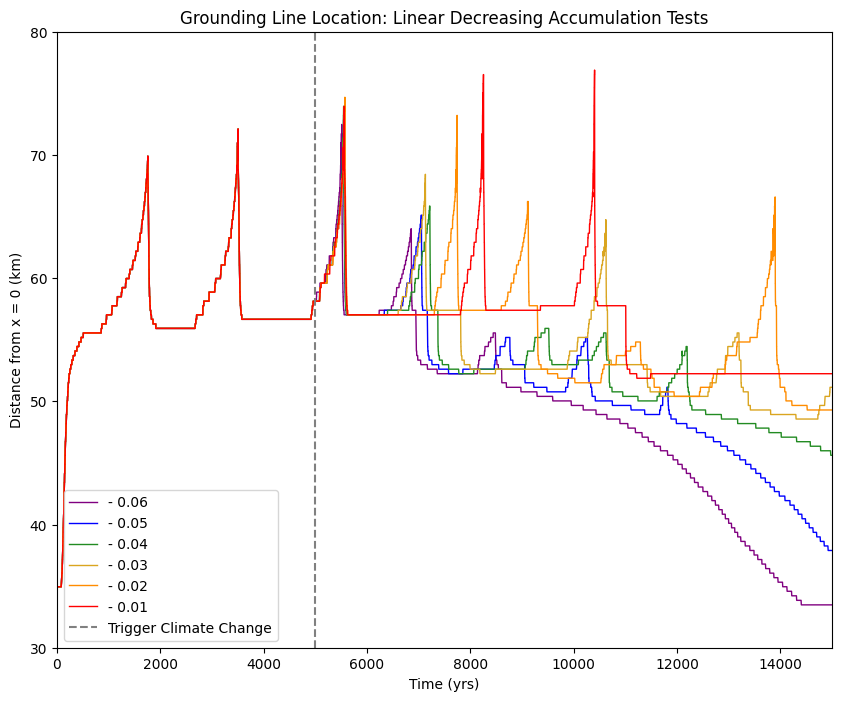

In [48]:
plt.figure(figsize=(10, 8))

plt.plot(time_06, GL_km_amax06, label='- 0.06', color = 'purple', linewidth = 1)
plt.plot(time_05, GL_km_amax05, label='- 0.05', color = 'blue', linewidth = 1)
plt.plot(time_04, GL_km_amax04, label='- 0.04', color = 'forestgreen', linewidth = 1)
plt.plot(time_03, GL_km_amax03, label='- 0.03', color = 'goldenrod', linewidth = 1)
plt.plot(time_02, GL_km_amax02, label='- 0.02', color = 'darkorange', linewidth = 1)
plt.plot(time_01, GL_km_amax01, label='- 0.01', color = 'red', linewidth = 1)
# plt.plot(time_amin_amax, GL_km_amax_amin_05, color = 'black', label='Amin & Amax - 0.05', linewidth = 3)
plt.axvline(x=5000, color ='gray', linestyle = '--', label = 'Trigger Climate Change')

plt.xlim(0,15000)
plt.ylim(30,80)

plt.title("Grounding Line Location: Linear Decreasing Accumulation Tests") 
plt.xlabel("Time (yrs)")
plt.ylabel("Distance from x = 0 (km)")
plt.legend(loc = 3)